<a href="https://colab.research.google.com/github/alkur-gh/finger-counter/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2

In [2]:
img_height, img_width = 224, 224
batch_size = 128
ncategories = 6

In [3]:
conv_model = keras.applications.MobileNetV2(
  # alpha=0.2,
  weights=None,
  include_top=True,
  classes=ncategories,
  input_shape=(img_height, img_width, 3),
)
# pretrained_model.trainable = False
model = keras.Sequential([
  conv_model,
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
data_path = '/content/drive/MyDrive/mldata/data.npz'
loaded = np.load(data_path)
Xtrain, ytrain, Xtest, ytest = loaded['arr_0'], loaded['arr_1'], loaded['arr_2'], loaded['arr_3']

In [5]:
Xtrain.shape, Xtest.shape

((2000, 224, 224, 3), (500, 224, 224, 3))

In [ ]:
ytrain.sum(axis=0), ytest.sum(axis=0)

(array([369., 329., 323., 344., 333., 302.], dtype=float32),
 array([97., 83., 74., 81., 80., 85.], dtype=float32))

In [ ]:
model  = keras.Sequential([
  keras.applications.MobileNetV2(
      alpha=0.25,
      weights=None,
      include_top=False,
      input_shape=(img_height, img_width, 3),
  ),
  keras.layers.Flatten(),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(ncategories, activation='softmax'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=5)

Epoch 1/5
63/63 [==============================] - 120s 2s/step - loss: 2.0446 - accuracy: 0.3290 - val_loss: 1.7916 - val_accuracy: 0.1600
Epoch 2/5
63/63 [==============================] - 114s 2s/step - loss: 1.3360 - accuracy: 0.5030 - val_loss: 1.7948 - val_accuracy: 0.1700
Epoch 3/5
63/63 [==============================] - 114s 2s/step - loss: 1.0776 - accuracy: 0.6210 - val_loss: 1.7996 - val_accuracy: 0.1600
Epoch 4/5
63/63 [==============================] - 114s 2s/step - loss: 0.9444 - accuracy: 0.6825 - val_loss: 1.8065 - val_accuracy: 0.1600
Epoch 5/5
63/63 [==============================] - 114s 2s/step - loss: 0.7511 - accuracy: 0.7510 - val_loss: 1.8154 - val_accuracy: 0.1600


In [6]:
model  = keras.Sequential([
  keras.layers.BatchNormalization(input_shape=(img_height, img_width, 3)),
  keras.applications.MobileNetV2(
      alpha=0.25,
      weights=None,
      include_top=False,
      input_shape=(img_height, img_width, 3),
  ),
  keras.layers.Flatten(),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(ncategories, activation='softmax'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=5)

Epoch 1/5
63/63 [==============================] - 149s 2s/step - loss: 2.0221 - accuracy: 0.2400 - val_loss: 1.7911 - val_accuracy: 0.1940
Epoch 2/5
63/63 [==============================] - 141s 2s/step - loss: 1.7088 - accuracy: 0.3470 - val_loss: 1.7915 - val_accuracy: 0.1940
Epoch 3/5
63/63 [==============================] - 141s 2s/step - loss: 1.4900 - accuracy: 0.4060 - val_loss: 1.7919 - val_accuracy: 0.1940
Epoch 4/5
 1/63 [..............................] - ETA: 2:14 - loss: 1.5316 - accuracy: 0.5625

KeyboardInterrupt: ignored

In [7]:
model  = keras.Sequential([
  keras.layers.BatchNormalization(input_shape=(img_height, img_width, 3)),
  keras.applications.MobileNetV2(
      alpha=0.25,
      weights=None,
      include_top=False,
      input_shape=(img_height, img_width, 3),
  ),
  keras.layers.Flatten(),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(ncategories, activation='softmax'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=3)

Epoch 1/3
63/63 [==============================] - 149s 2s/step - loss: 2.5543 - accuracy: 0.3800 - val_loss: 2.9802 - val_accuracy: 0.1480
Epoch 2/3
63/63 [==============================] - 142s 2s/step - loss: 1.3098 - accuracy: 0.6045 - val_loss: 2.4824 - val_accuracy: 0.1660
Epoch 3/3
63/63 [==============================] - 142s 2s/step - loss: 0.8178 - accuracy: 0.7525 - val_loss: 4.2220 - val_accuracy: 0.1480


In [8]:
model  = keras.Sequential([
  keras.layers.BatchNormalization(input_shape=(img_height, img_width, 3)),
  keras.applications.MobileNetV2(
      alpha=0.25,
      weights=None,
      include_top=False,
      input_shape=(img_height, img_width, 3),
  ),
  keras.layers.Flatten(),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(ncategories, activation='softmax'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=3)

Epoch 1/3
63/63 [==============================] - 149s 2s/step - loss: 2.9050 - accuracy: 0.4270 - val_loss: 2.0975 - val_accuracy: 0.1620
Epoch 2/3
63/63 [==============================] - 143s 2s/step - loss: 1.2942 - accuracy: 0.6410 - val_loss: 1.8583 - val_accuracy: 0.1660
Epoch 3/3
63/63 [==============================] - 143s 2s/step - loss: 0.7039 - accuracy: 0.7785 - val_loss: 2.4923 - val_accuracy: 0.1480


In [9]:
model  = keras.Sequential([
  keras.layers.BatchNormalization(input_shape=(img_height, img_width, 3)),
  keras.applications.MobileNetV2(
      alpha=0.25,
      weights=None,
      include_top=False,
      input_shape=(img_height, img_width, 3),
  ),
  keras.layers.Flatten(),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(ncategories, activation='softmax'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=3)

Epoch 1/3
63/63 [==============================] - 153s 2s/step - loss: 1.6237 - accuracy: 0.3790 - val_loss: 2.0714 - val_accuracy: 0.1660
Epoch 2/3
63/63 [==============================] - 145s 2s/step - loss: 0.7620 - accuracy: 0.7165 - val_loss: 2.2645 - val_accuracy: 0.1620
Epoch 3/3
63/63 [==============================] - 144s 2s/step - loss: 0.3184 - accuracy: 0.8995 - val_loss: 2.2649 - val_accuracy: 0.1480


In [10]:
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(img_height, img_width, 3)),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(2),
  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(2),
  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(128, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(2),
  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(256, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(2),
  keras.layers.Dropout(0.25),

  keras.layers.Flatten(),

  keras.layers.Dropout(0.5),
  keras.layers.Dense(512,  activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(ncategories, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=3)

Epoch 1/3
63/63 [==============================] - 458s 7s/step - loss: 0.4219 - accuracy: 0.8560 - val_loss: 0.8693 - val_accuracy: 0.6340
Epoch 2/3
63/63 [==============================] - 452s 7s/step - loss: 0.0828 - accuracy: 0.9770 - val_loss: 0.0391 - val_accuracy: 0.9880
Epoch 3/3
63/63 [==============================] - 452s 7s/step - loss: 0.0556 - accuracy: 0.9855 - val_loss: 0.0220 - val_accuracy: 0.9940


In [19]:
model = keras.Sequential([
  keras.layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(ncategories, activation='softmax'),                        
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=3)

Epoch 1/3
63/63 [==============================] - 430s 7s/step - loss: 184.7520 - accuracy: 0.7020 - val_loss: 0.0524 - val_accuracy: 0.9800
Epoch 2/3
63/63 [==============================] - 416s 7s/step - loss: 0.1118 - accuracy: 0.9655 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 3/3
63/63 [==============================] - 417s 7s/step - loss: 0.0518 - accuracy: 0.9830 - val_loss: 0.0093 - val_accuracy: 0.9940


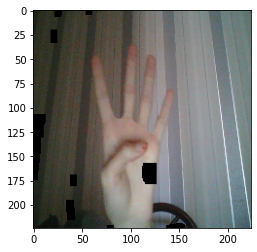

(2, array([[2.2039806e-02, 1.2840649e-02, 9.6426600e-01, 8.4910245e-04,
         2.9815367e-06, 1.3657215e-06]], dtype=float32))

In [30]:
img = cv2.cvtColor(cv2.resize(cv2.imread('/content/drive/MyDrive/mldata/myhand_4.png', 1), (img_width, img_height)), cv2.COLOR_BGR2RGB)
img = bgSubMasking(img)
plt.imshow(img)
plt.show()
ypredict = model.predict(np.expand_dims(img, axis=0))
ypredict.argmax(), ypredict

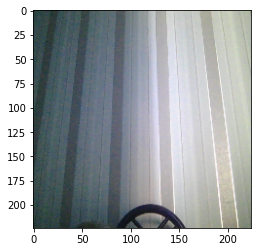

array([[0.00186487, 0.00163023, 0.8838748 , 0.10322137, 0.00815444,
        0.0012544 ]], dtype=float32)

In [21]:
img = cv2.resize(cv2.imread('/content/drive/MyDrive/mldata/background.png', 1), (img_width, img_height))
plt.imshow(img)
plt.show()
model.predict(np.expand_dims(img, axis=0))